<a href="https://colab.research.google.com/github/MariaShaiina/ds_cours_2023/blob/main/lab1-perceptron/lab1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Лабораторная работа №1 -  Перцептрон**

Шаина Мария группа 6231

В качестве входных данных к лабораторной работе взят набор данных MNIST - это большая коллекция рукописных цифр. MNIST содержит коллекцию из  70 000 изображений (60 000 на обучающей и 10 000 на тестовой) 28 x 28  рукописных цифр от 0 до 9. Набор данных уже разделен на наборы для обучения и тестирования.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier #multi-layer perceptron classifier

In [ ]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

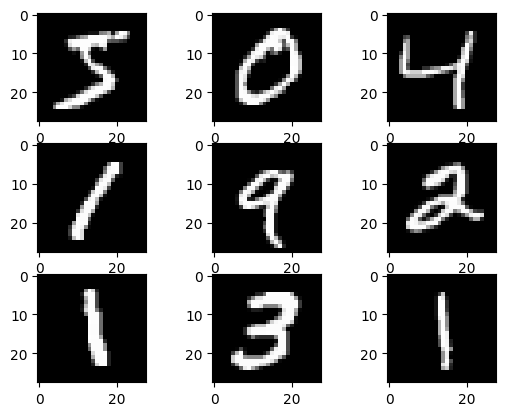

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

Проверим на сбалансированность классов

In [ ]:
unique, counts = np.unique(train_y, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Class counts:", class_counts)

Class counts: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Видим, что различия в количестве незаначительны, поэтому датасет можно считать относительно сбалансированным

Нормализация данных

In [ ]:
#Изображения в mnist 28 на 28 пикселей
train_X.shape, test_X.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
#Разворачиваем изображение в вектор 28х28=784, нормализуем значения от 0 до 1
X_train_vec = (train_X.reshape((-1, 28*28)) / 255).astype('float32')
X_test_vec = (test_X.reshape((-1, 28*28)) / 255).astype('float32')
X_test_vec.shape, X_test_vec.shape

((10000, 784), (10000, 784))

Для решения данной задачи, каждая метка класса должна представлять собой вектор из 10 значений - 0 или 1 (one-hot encoding)

In [ ]:
print("Test Original Labels:")
print(test_y)


train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

print("\nTest Converted Labels:")
print(test_y)

Test Original Labels:
[7 2 1 ... 4 5 6]

Test Converted Labels:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1 Обучение нейронной сети

Архитектура однослойного перцептрона

<img src="https://images.deepai.org/glossary-terms/e6f7f481a2fc43ea8c8fd8d32fbfcae4/1_n6sJ4yZQzwKL9wnF5wnVNg.png" width="654" height="334">


 $f_1(x) - ReLU, f_2(x) - Softmax$

<img src="https://www.researchgate.net/publication/357633642/figure/fig6/AS:1114695020884006@1642775411514/Softmax-and-cross-entropy-loss-function.png" width="461" height="145">




$\text {Cross-Entropy Loss}$

In [ ]:
#softmax activation function - для выходного слоя
def softmax(x):
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True)) #значение exp от класса
  return exp_values / np.sum(exp_values, axis=1, keepdims=True) #значение exp от класса / сумма значений exp от всех классов

# Функция кросс-энтропии (функция ошибки)
def cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - np.sum(y_true * np.log(y_pred)) / len(y_true)

# Функция для обучения однослойного перцептрона
def perceptron(input, target, weights_0_1, learning_rate):

    # Forward pass
    layer_0 = input
    layer_1 = softmax(layer_0.dot(weights_0_1))

    # Calculate error
    error = cross_entropy(target, layer_1)

    predictions = np.argmax(layer_1, axis=1)
    true_labels = np.argmax(target, axis=1)

    # Backward pass
    layer_1_delta = layer_1 - target
    weights_0_1_corrections = layer_0.T.dot(layer_1_delta)

    # Update weights
    weights_0_1 -= learning_rate * weights_0_1_corrections

    return weights_0_1, error, predictions, true_labels

In [ ]:
#Определяем гиперпараметры модели
lr = 0.005
epochs = 25

#Инициализируем веса между входным и выходным слоями
np.random.seed(1)
weights_0_1 = 2*np.random.random((784,10)) - 1

# Создаем списки для хранения значений ошибки и точности на каждой итерации
train_error_hist = []
train_accuracy_hist = []
test_error_hist = []
test_accuracy_hist = []

# Обучение модели
for epoch in range(epochs):
  #Точность на обучающей выборке
  weights_0_1, train_error, train_predictions, train_true_labels = perceptron(X_train_vec, train_y,  weights_0_1, learning_rate=lr)
  train_accuracy = accuracy_score(train_true_labels, train_predictions)
  train_accuracy_hist.append(train_accuracy)
  train_error_hist.append(train_error)

  # Точность на тестовой выборке
  weights_0_1, test_error, test_predictions, test_true_labels = perceptron(X_test_vec, test_y,  weights_0_1, learning_rate=lr)
  test_accuracy = accuracy_score(test_true_labels, test_predictions)
  test_accuracy_hist.append(test_accuracy)
  test_error_hist.append(test_error)

  print(f'Epoch {epoch + 1}/{epochs}, \nTrain Error: {train_error}, \nTrain Accuracy: {train_accuracy}, \nTest Error: {test_error}, \nTest Accuracy: {test_accuracy}')
  print()

Epoch 1/25, 
Train Error: 7.5707237597360395, 
Train Accuracy: 0.06718333333333333, 
Test Error: 27.183662915852928, 
Test Accuracy: 0.1985

Epoch 2/25, 
Train Error: 23.96923934538205, 
Train Accuracy: 0.2997166666666667, 
Test Error: 21.695915583972422, 
Test Accuracy: 0.3646

Epoch 3/25, 
Train Error: 14.276854009825852, 
Train Accuracy: 0.5715333333333333, 
Test Error: 17.172046108334257, 
Test Accuracy: 0.496

Epoch 4/25, 
Train Error: 13.525832440698116, 
Train Accuracy: 0.602, 
Test Error: 18.96211965731259, 
Test Accuracy: 0.4415

Epoch 5/25, 
Train Error: 13.1206407229784, 
Train Accuracy: 0.6078333333333333, 
Test Error: 23.972892268044365, 
Test Accuracy: 0.2993

Epoch 6/25, 
Train Error: 15.69893654213517, 
Train Accuracy: 0.5372166666666667, 
Test Error: 22.369615882312363, 
Test Accuracy: 0.3443

Epoch 7/25, 
Train Error: 16.388424815991037, 
Train Accuracy: 0.5166333333333334, 
Test Error: 13.625578607996157, 
Test Accuracy: 0.5964

Epoch 8/25, 
Train Error: 10.211631141

Построение графиков

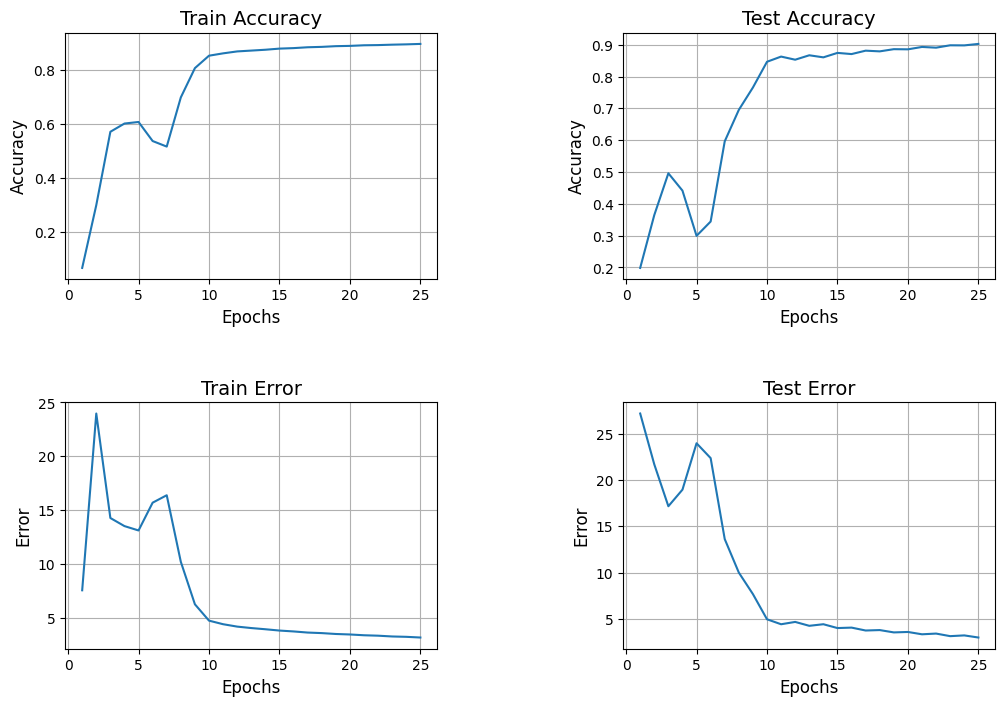

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax[0,0].set_title('Train Accuracy', size=14)
ax[0,0].set_xlabel('Epochs', size=12)
ax[0,0].set_ylabel('Accuracy', size=12)
ax[0,1].set_title('Test Accuracy', size=14)
ax[0,1].set_xlabel('Epochs', size=12)
ax[0,1].set_ylabel('Accuracy', size=12)
ax[1,0].set_title('Train Error', size=14)
ax[1,0].set_xlabel('Epochs', size=12)
ax[1,0].set_ylabel('Error', size=12)
ax[1,1].set_title('Test Error', size=14)
ax[1,1].set_xlabel('Epochs', size=12)
ax[1,1].set_ylabel('Error', size=12)

ax[0,0].plot(range(1, epochs+1), train_accuracy_hist)
ax[0,1].plot(range(1, epochs+1), test_accuracy_hist)
ax[1,0].plot(range(1, epochs+1), train_error_hist)
ax[1,1].plot(range(1, epochs+1), test_error_hist)
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()

**Вывод:**
Модель обучается, о чем свидетельствует увеличение точности с числом итераций. Ошибка на тестовой выборке на последних итерациях ниже, чем на обучающей, что говорит о том, что модель не переобучилась.

## 2 Обучение с использованием однослойного перцептрона из sklearn

In [ ]:
# classification model
clf = Perceptron(max_iter=16, eta0=0.005, random_state=1)
clf.fit(X_train_vec, np.argmax(train_y, axis=1))

Perceptron(eta0=0.005, max_iter=16, random_state=1)

In [ ]:
#Получение предсказаний
train_pred = clf.predict(X_train_vec)
test_pred = clf.predict(X_test_vec)
train_accuracy_skl = accuracy_score(np.argmax(train_y, axis=1), train_pred)
test_accuracy_skl = accuracy_score(np.argmax(test_y, axis=1), test_pred)

print(f'Train Accuracy: {train_accuracy_skl} \nTest Accuracy: {test_accuracy_skl}')

Train Accuracy: 0.8801333333333333 
Test Accuracy: 0.8732


## 3 Обучение с использованием многослойного перцептрона из sklearn

In [ ]:
mpl_clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100, learning_rate_init=0.005, random_state=1)
mpl_clf.fit(X_train_vec, np.argmax(train_y, axis=1))

MLPClassifier(hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=100,
              random_state=1)

In [ ]:
#Получение предсказаний
train_pred = mpl_clf.predict(X_train_vec)
test_pred = mpl_clf.predict(X_test_vec)
mlp_train_accuracy = accuracy_score(np.argmax(train_y, axis=1), train_pred)
mlp_test_accuracy = accuracy_score(np.argmax(test_y, axis=1), test_pred)

print(f'Train Accuracy: {mlp_train_accuracy} \nTest Accuracy: {mlp_test_accuracy}')

Train Accuracy: 0.9942833333333333 
Test Accuracy: 0.9767


## Cравнительный анализ результатов

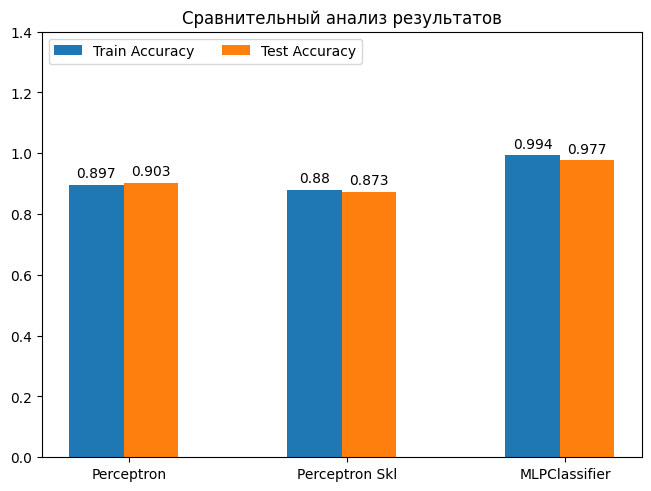

In [ ]:
train_acc = np.array([train_accuracy, train_accuracy_skl, mlp_train_accuracy])
test_acc = np.array([test_accuracy, test_accuracy_skl, mlp_test_accuracy])

classifiers = ("Perceptron", "Perceptron Skl", "MLPClassifier")
accuracy_score =  {
    'Train Accuracy': np.around(train_acc, decimals=3),
    'Test Accuracy': np.around(test_acc, decimals=3),
}

x = np.arange(len(classifiers))  # the label locations
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracy_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Cравнительный анализ результатов')
ax.set_xticks(x + 0.15, classifiers)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1.4)

plt.show()

**Вывод:**

Лучшие результаты показал MLPClassifier классификатор. Самые низкие значения точности получились при работе однослойного перцептрона из sklearn. Это может быть связано с тем, что задача многоклассовой классификации лучше решается с использованием многоклассового классификатора. Также, добавление в модель скрытыго слоя и увеличение числа итераций позволи получить лучшие показатели работы модели на MLPClassifier.